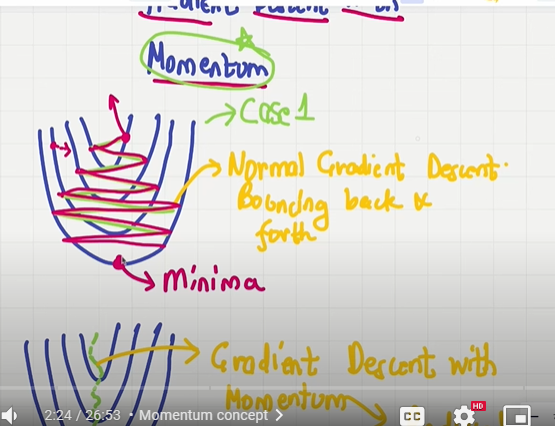

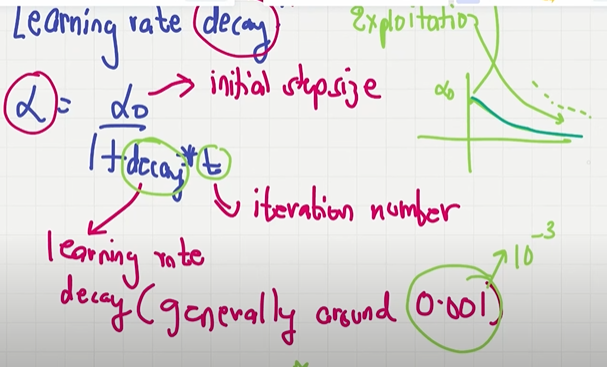

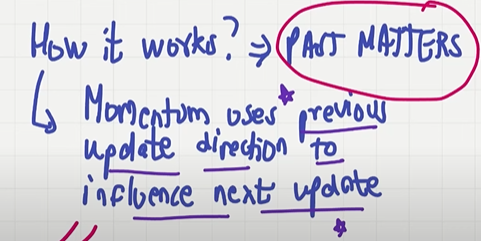

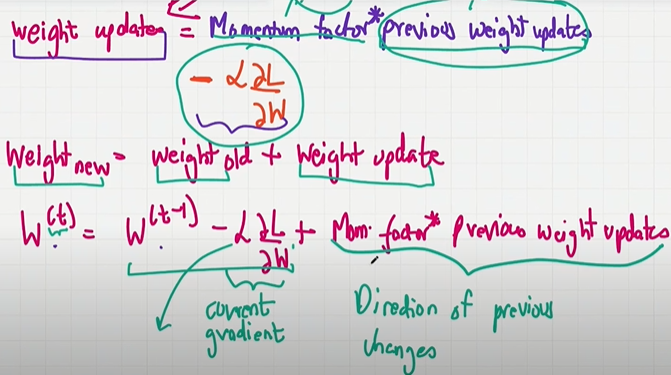

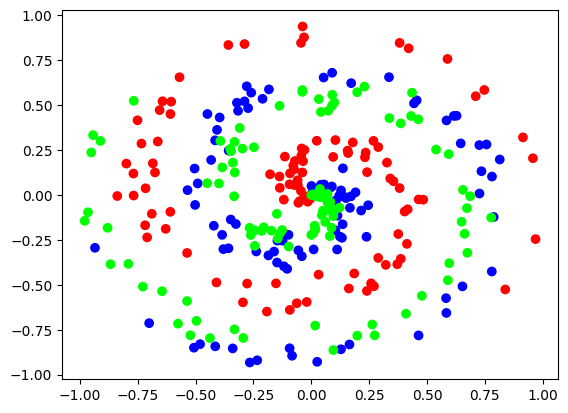

In [1]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [2]:
from Dense_Layer import Layer_Dense
from ReLU_Act import Activation_ReLU
from SGD_optimizer import Optimizer_SGD
from Softmax_Act import Activation_Softmax
from Cat_Crossentropy_Loss import Loss_Categorical_Crossentropy
from softmax_loss_catcrossentropy import Activation_Softmax_Loss_CategoricalCrossentropy

In [3]:
import numpy as np

# Assuming the necessary classes (Layer_Dense, Activation_ReLU, 
# Activation_Softmax_Loss_CategoricalCrossentropy, Optimizer_SGD, and spiral_data) are defined elsewhere

# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD(decay=1e-3, momentum=0.9)

# Train in loop
for epoch in range(1000):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    
    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)
    
    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)
    
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)
    
    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')
    
    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    
    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


epoch: 0, acc: 0.343, loss: 1.099, lr: 1.0
epoch: 100, acc: 0.470, loss: 1.033, lr: 0.9099181073703367
epoch: 200, acc: 0.537, loss: 0.918, lr: 0.8340283569641367
epoch: 300, acc: 0.557, loss: 0.851, lr: 0.7698229407236336
epoch: 400, acc: 0.740, loss: 0.642, lr: 0.7147962830593281
epoch: 500, acc: 0.787, loss: 0.526, lr: 0.66711140760507
epoch: 600, acc: 0.583, loss: 1.107, lr: 0.6253908692933083
epoch: 700, acc: 0.760, loss: 0.520, lr: 0.5885815185403178
epoch: 800, acc: 0.803, loss: 0.414, lr: 0.5558643690939411
epoch: 900, acc: 0.810, loss: 0.424, lr: 0.526592943654555
